<a href="https://colab.research.google.com/github/ucfilho/raianars_june_2020/blob/master/ANN_PCA_jun_20_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/Raianars_paper_One


In [2]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=10 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=200 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão
############################### Função

dim=10
#fchoice='Rastrigin' #fchoice='Michalewicz'
fchoice='Schwefel'

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
Fun=Function.Rastrigin
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/Raianars_paper_One/ANN_read_matrix


In [5]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
fields = ['DIr','FRAC Its','Fo','CRo','F','CR']
Num=2000
Parallel_Coord=np.zeros((Num,6)) #
Max_DIr=X_max_F[0];Max_Fr=X_max_F[1]
Min_DIr=X_min_F[0];Min_Fr=X_min_F[1];Min_Fr=0
Max_F=X_max_F[2];Max_CR=X_max_F[3]
Min_F=X_min_F[2];Min_CR=X_min_F[3]

In [6]:

for i in range(Num):
  DIr=  Min_DIr+(Max_DIr-Min_DIr)*np.random.random();
  Frac=Min_Fr+(Max_Fr-Min_Fr)*np.random.random();
  Fo=Min_F+(Max_F-Min_F)*np.random.random();
  CRo=Min_CR+(Max_CR-Min_CR)*np.random.random();
  x_train=np.array([DIr,Frac,Fo,CRo])
  x_train=pd.DataFrame(x_train).T
  x_train=Go2Ann.Normatiza(x_train,X_max_F,X_min_F)
  y_calc_F=Go2Ann.ANN_ycal(syn0_F,syn1_F,x_train)
  y_calc_CR=Go2Ann.ANN_ycal(syn0_CR,syn1_CR,x_train)
  y_cod_F=Go2Ann.Classifica(y_calc_F)
  y_cod_CR=Go2Ann.Classifica(y_calc_CR)
  Parallel_Coord[i,0]=DIr;Parallel_Coord[i,1]=Frac;
  Parallel_Coord[i,2]=Fo;Parallel_Coord[i,3]=CRo;
  Parallel_Coord[i,4]=y_cod_F[0];Parallel_Coord[i,5]=y_cod_CR[0];
  
Parallel_Coord=pd.DataFrame(Parallel_Coord,columns =fields)



In [7]:
print(Parallel_Coord)

           DIr  FRAC Its        Fo       CRo    F   CR
0     0.279625  0.375097  0.131515  0.320361  1.0 -1.0
1     0.908125  0.816828  0.740894  0.203860 -1.0 -1.0
2     0.425423  0.648801  0.641960  0.258684  1.0 -1.0
3     0.385707  0.464593  0.259805  0.409584  1.0 -1.0
4     0.310585  0.329281  0.560738  0.772058 -1.0  1.0
...        ...       ...       ...       ...  ...  ...
1995  0.382173  0.944568  0.813457  0.140744 -1.0 -1.0
1996  0.514495  0.876194  0.980436  0.456272 -1.0  1.0
1997  0.851473  0.437081  0.832138  0.549667 -1.0  1.0
1998  0.754916  0.885139  0.992456  0.538201 -1.0  1.0
1999  0.346851  0.249973  0.044147  0.146938  1.0 -1.0

[2000 rows x 6 columns]


In [8]:
X=np.array(Parallel_Coord[['DIr','FRAC Its','Fo','CRo']])
y=np.array(Parallel_Coord[['F']])

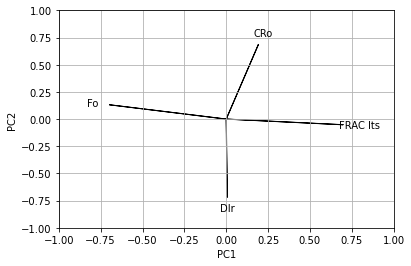

In [19]:
#In general it is a good idea to scale the data
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

pca = PCA()
pca.fit(X,y)
x_new = pca.transform(X)   


#Call the function. 
Name=['DIr','FRAC Its','Fo','CRo']
Num=4
coeff=pca. components_
for i in range(Num):
  plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'k',alpha = 1.0)
  plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, Name[i], color = 'k', ha = 'center', va = 'center')

plt.ylim(-1, 1)     # set the ylim to bottom, top
plt.xlim(-1, 1)     # set the ylim to bottom, top
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

plt.show()

In [15]:
print(coeff)
print(Name)

[[ 0.00597779 -0.71575362 -0.48153979 -0.50574742]
 [ 0.69397515 -0.05178077 -0.4776399   0.5362624 ]
 [-0.69401789  0.13087576 -0.59918379  0.37708021]
 [ 0.19157743  0.68402269 -0.42539199 -0.56076082]]
['DIr', 'FRAC Its', 'Fo']


In [ ]:
!pip install pca

In [ ]:
from pca import pca

In [ ]:
X=Parallel_Coord[['DIr','FRAC Its','Fo','CRo']]
y=Parallel_Coord[['F']]

In [ ]:
# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=0.95)

# Or reduce the data towards 2 PCs
model = pca(n_components=2)

# Fit transform
results = model.fit_transform(X)

# Plot explained variance
fig, ax = model.plot()

In [ ]:
# Scatter first 2 PCs
fig, ax = model.scatter()



In [ ]:
# Make biplot with the number of features
fig, ax = model.biplot(n_feat=4)

In [ ]:
model = pca(n_components=3)
results = model.fit_transform(X)
fig, ax= model.scatter3d()


In [ ]:
fig, ax = model.biplot3d(n_feat=4)

In [ ]:
fig = plt.figure()